In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [5]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
def headwriting(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [8]:
df['rate'] = df['rate'].apply(headwriting)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Majority customers oders from which types of restraunt

<Axes: xlabel='listed_in(type)', ylabel='count'>

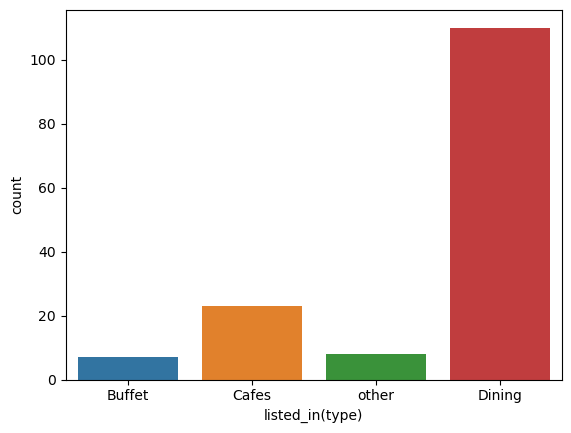

In [10]:
sns.countplot(x=df['listed_in(type)'])

# conclusion :-

# maximum customers likely to orders dining restaurant 

# No. of votes recieved by each restaurant

Text(0, 0.5, 'No. of votes')

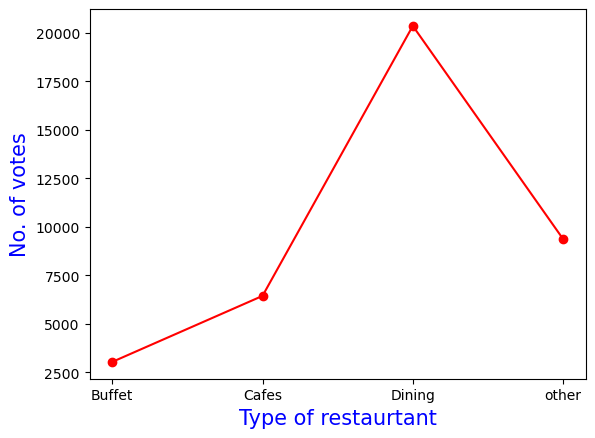

In [11]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='red',marker="o")
plt.xlabel("Type of restaurtant",c='blue',size='15')
plt.ylabel("No. of votes",c='blue',size='15')

# Conclusion:-

# Dining restaurant has recieved maximum no. of votes

# Maximum Rating that a Restaurant have

(array([ 1.,  9.,  9., 21., 18., 26., 30., 21.,  9.,  4.]),
 array([2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6]),
 <BarContainer object of 10 artists>)

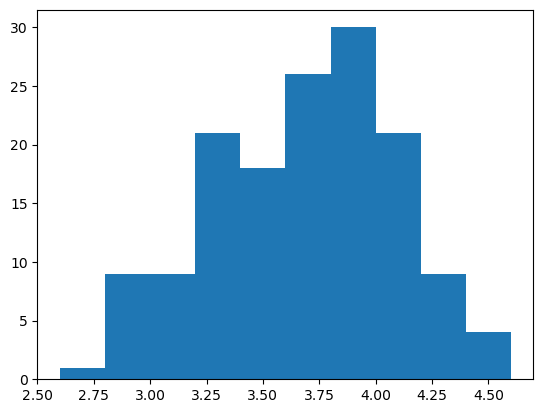

In [13]:
plt.hist(df['rate'],bins=10)

# Conclusion:-

# The restaurant gets rating in between 3.5 to 4.5 maximum no. of times
# least rating is from 2.5 to 3.0

# Average spending price on food by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

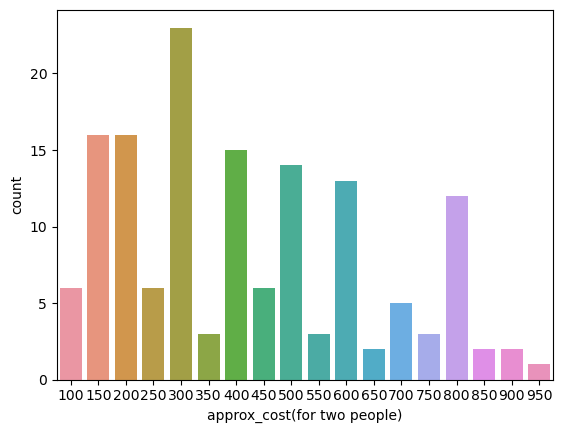

In [15]:
data = df['approx_cost(for two people)']
sns.countplot(x=data)

# Conclusion:- 
# 300 is the average price which mostly couples were spending

# Maximum Rating(online or offline)

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

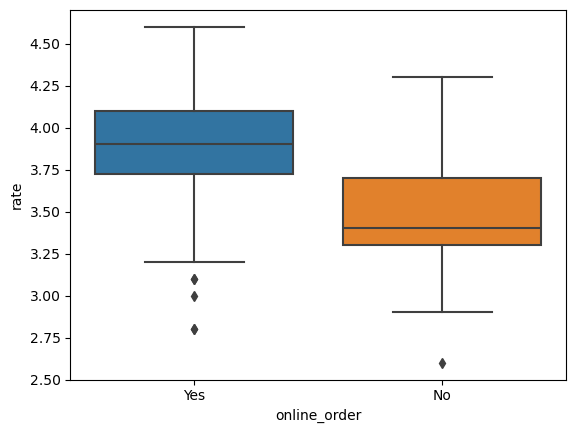

In [17]:
sns.boxplot(x='online_order',y='rate',data=df)

# Conclusion:- 
# Online order gets the maximum rating of "4.7" where as the offline gets the maximum as the "4.4"
# so online order has maximum rating as comapred to offline order

# Which type of restaurant has more offline orders

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(50.722222222222214, 0.5, 'Modes')

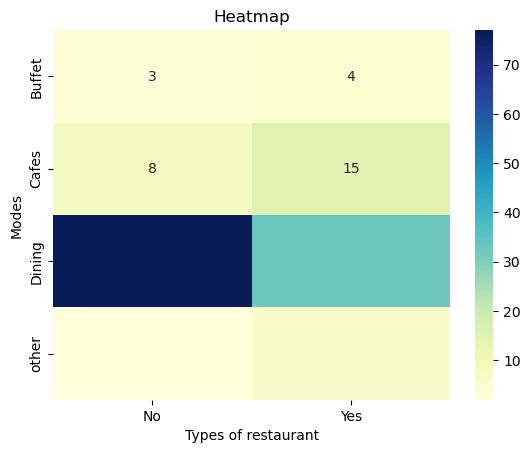

In [19]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Types of restaurant")
plt.ylabel("Modes")

In [20]:
df.to_csv('final_data.csv', index=False)

In [21]:
df.to_excel('output.xlsx', index=False, engine='openpyxl')